# Coding activity 1: Nearest neighbor smoothers

## Nearest neighbor smoothers

 Write a nearest neighbor smoother.

In [1]:
import numpy as np

In [ ]:

def nns(xis, yis, x):
    """Return yis[i], where xis[i] is the entry of xis closest to x."""
    
    # Your code goes here.
    
    return yis[i]

# (Check) Should print 6 666 666 6666.
xis = [0, 1, 5, 6.5]
yis = [6, 66, 666, 6666]
print(nns(xis, yis, -1), nns(xis, yis, 4), nns(xis, yis, 5.1), nns(xis, yis, 100))

Write a "vectorized" nearest neighbor smoother.

Your solution here should be independent of your solution to the previous exercise.
The naming clash is intentional.

In [ ]:
def nns(xis, yis, xs):
    """Same as nns, but returning a list of ys given a list of xs."""
    
    # Your code goes here. Don't invoke code from the previous exercise.

    return ys

# (Check) Should print [   6  666  666 6666].
xis = np.array([0, 1, 5, 6.5])
yis = np.array([6, 66, 666, 6666])
print(nns(xis, yis, [-1, 4, 5.1, 100]))

Write a "higher order" smoother function, i.e., a function that takes training data as input and return a function to evaluate on test data. Are there advantages to such an implementation over that of the previous exercise?

In [ ]:
def nns_factory(xis, yis):
    def nns(xs):
        
        # Your code goes here. Don't invoke code from previous exercises.
        
        return ys
    return nns

# (Check) Should print [   6  666  666 6666].
xis = np.array([0, 1, 5, 6.5])
yis = np.array([6, 66, 666, 6666])
nns = nns_factory(xis, yis)
print(nns([-1, 4, 5.1, 100]))

If you don't consider the "higher order function" pattern from the previous exercise to be particularly pythonic, you aren't alone. Let's write a class offering the same functionality, in the <code>sklearn</code> style.

In [ ]:
from sklearn.base import RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class NNS(RegressorMixin):
    
    def fit(self, X, y):
        
        # Check that X and y have compatible shapes.
        X, y = check_X_y(X, y)

        # Store the training data on the instance. (Why?)
        self.X_ = X
        self.y_ = y
        
        ### Your code goes here.

        # Return the instance. (Why?)
        return self
    
    def predict(self, X):
        
        # Check is fit had been called.
        check_is_fitted(self, ['X_', 'y_'])
        
        # Validate input type.
        X = check_array(X)
        
        # Your code goes here.
        
        return y
    
# (Check) Should print [6, 666, 666, 6666].
X = np.array([0, 1, 5, 6.5]).reshape((-1, 1))
y = np.array([6, 66, 666, 6666])
X_test = np.array([-1, 4, 5.1, 100]).reshape(-1, 1)
S = NNS().fit(X, y)
print(S.predict(X_test))
print(NNS()
      .fit([0, 1, 5, 6.5], [6, 66, 666, 6666])
      .predict([-1, 4, 5.1, 100]))

- What happens if you remove the `.reshape(-1, 1)` method call in the definition of `X` and run the above cell again?

- If you inspect the methods available on `S` by typing `S.<tab>`, you'll notice a `score` method.
  - Where did it come from? What does it do? Find out by typing `S.score?<ctrl+enter>` or, on a mac, `S.score?<command+enter>`. (`<command+enter>` is a jupyter keyboard shortcut for running the current cell.)
  - Try it out! You'll need to provide `y`-values to go with the `x`-values in `X_test`.
  - Look at the source code of `RegressorMixin`. (Where is it?) Notice that the implementation of the `score` method invokes the `predict`, which we have thoughfully provided. According to the <a href="https://scikit-learn.org/stable/glossary.html#term-regressors"><code>sklearn</code> docs</a>, a *regressor* is a class that implements `fit`, `predict`, and `score`. (Duck typing!)

## Exercise: Piecewise linear smoothers

Write a class `PiecewiseLinear` that interpolates a dataset in a piecewise-linear fashion. It should inherit from `RegressorMixin` and implement `fit` and `predict`.

The equation of the line through $(x_i, y_i)$ and $(x_{i+1}, y_{i+1})$ is

$$ y = \frac{y_{i+1} - y_i}{x_{i+1} - x_i}(x - x_i) + y_i.$$

Test your implementation: Construct training and test data for which you know what the output of `predict` should be.

Compute some $R^2$-scores. Are the results reasonable?

Add a method `plot` to `PiecewiseLinear` that overlays the piecewise-linear fit over the scatter plot of the training data. Your method should warn the user if the instance lacks test data, `X_` and `y_`.

In [126]:
from sklearn.base import RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class PiecewiseLinear(RegressorMixin):
    
    def fit(self, X, y):
     
        self.X_ = X
        self.y_ = y
        
        self.m_ = (y[1:] - y[:-1])/(X[1:] - X[:-1])
        self.b_ = y[1:] - self.m_*X[1:]
        
        return self
    
    def predict_one(self, x):
        if x == self.X_[0]:
            return self.y_[0]
        else:
            i = np.argmax(x <= self.X_)
            return self.m_[i - 1]*x + self.b_[i - 1]
    
    def predict(self, X):
        y = [self.predict_one(x) for x in X]
        return y
    
X = np.array([0, 1, 5, 6.5])
y = np.array([6, 66, 666, 6666])

P = PiecewiseLinear().fit(X, y)
P.predict([0, 3])

[6, 366.0]

In [35]:
x = np.array([5, 3, 2, 4, 1])
y = np.array([6, 4, 3, 5, 2])
i = np.argsort(x)
print(x[i], y[i])

[1 2 3 4 5] [2 3 4 5 6]


## Exercise: Simple linear regression

Write a class `SimpleLinearRegression` that constructs the least-squares line associated to a dataset. It should inherit from `RegressorMixin` and implement `fit` and `predict`.

The least-squares coefficients are given by
$$
\beta = (X^TX)^{-1}X^Ty,
\quad\text{where}\quad
X=\begin{bmatrix}1&x_1\\1&x_2\\\vdots&\vdots\\1&x_n\end{bmatrix},\quad
y=\begin{bmatrix}y_1\\y_2\\\vdots\\y_n\end{bmatrix},\quad
\text{and}\quad
\beta=\begin{bmatrix}\beta_0\\\beta_1\end{bmatrix}.
$$

Test your implementation: Construct training and test data for which you know what the output of `predict` should be.

Compute some $R^2$-scores. Are the results reasonable?

Add a method `plot` to `PiecewiseLinear` that overlays the least-squares line over the scatter plot of the training data. Your method should warn the user if the the model hasn't been fit.

Compare `SimpleLinearRegression` to `PiecewiseLinear` and `NNS`.
Identify the major structural difference reflecting the fact that `SimpleLinearRegression` is parametric while `PiecewiseLinear` and `NNS` are nonparametric.

In [ ]:
# Your code goes here.

In [83]:
X = np.array([0, 2, 4, 6])
y = np.array([0.5, 1, 0, 2])

m = (y[1:] - y[:-1])/(X[1:] - X[:-1])
slopes*(X[1:] - 3) + y[1:]
b = y[1:] - slopes*X[1:]
x = 1
sum((slopes*x + b)*(X[:-1] < x)*(x <= X[1:])) + (x == X[0])*y[0]

0.75

In [69]:
from matplotlib import pyplot as plt

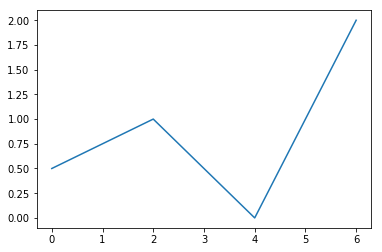

In [81]:
plt.plot(X, y)

In [111]:
np.argmax(1 <= np.array([0, 0, 1, 2, 3]))

2

In [64]:
(X[1] - 3)*0.5 + 

-0.5

In [ ]:
y1 = mx1 + b